## Livro

Bibliotecas - Pag 15 e 16

Cookiecutter (Pag 21): https://github.com/drivendata/cookiecutter-data-science

## **Bibliotecas (Import)**


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import (
    train_test_split
    )

from sklearn import (
    preprocessing
    )

In [6]:
#!pip uninstall pandas-profiling
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [7]:
import warnings
warnings.filterwarnings('ignore')

## **Coleta de dados**


In [8]:
df = pd.read_csv("titanic.csv").drop(1309)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [9]:
df = df.drop(columns=[
    "name",
    "ticket",
    "home.dest",
    "boat",
    "body",
    "cabin"
])

df = pd.get_dummies(df, drop_first=True) #substituindo colunas categoricas e dropando coluna correlacionada
y = df.survived
X = df.drop(columns='survived')
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
    ) 

In [10]:
from sklearn.experimental import (
    enable_iterative_imputer
)
from sklearn.impute import IterativeImputer

num_cols = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male']

imputer = IterativeImputer()
imputed = imputer.fit_transform(X_train[num_cols])
X_train.loc[:,num_cols] = imputed
imputed = imputer.transform(X_test[num_cols])
X_test.loc[:,num_cols] = imputed

In [11]:
cols = "pclass,age,sibsp,parch,fare".split(",")
sca = preprocessing.StandardScaler()

normalize_train = sca.fit_transform(X_train[cols])
X_train = pd.DataFrame(normalize_train, columns=cols).join(X_train[['sex_male','embarked_Q','embarked_S']].reset_index(drop=True))

normalize_test = sca.transform(X_test[cols])
X_test = pd.DataFrame(normalize_test, columns=cols).join(X_test[['sex_male','embarked_Q','embarked_S']].reset_index(drop=True))

In [12]:
X_test

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,0.825248,0.496095,-0.498616,-0.432553,-0.502719,1.0,0,1
1,0.825248,-0.673461,0.425943,0.686709,-0.339518,1.0,0,0
2,0.825248,-0.128452,-0.498616,-0.432553,-0.488120,1.0,0,1
3,0.825248,-0.128538,-0.498616,-0.432553,-0.485199,1.0,0,1
4,0.825248,-0.128371,-0.498616,-0.432553,-0.490881,1.0,1,0
...,...,...,...,...,...,...,...,...
388,-0.363317,0.106243,-0.498616,-0.432553,-0.391446,1.0,0,1
389,0.825248,-0.790416,-0.498616,-0.432553,-0.500745,1.0,0,0
390,-0.363317,0.963917,-0.498616,-0.432553,-0.391446,1.0,0,1
391,0.825248,-0.282937,-0.498616,-0.432553,-0.485199,0.0,0,1


In [13]:
X = pd.concat([X_train, X_test]).reset_index(drop=True)
y = pd.concat([y_train, y_test]).reset_index(drop=True)

## **PCA**

**components_:** matriz de componentes principais, cada coluna representa um componente principal. Se for igual a None devolve o mesmo número de features.

**explained_variance_:** variação explicada pelos componentes principais, cada elemento representa a variação explicada pelo respectivo componente principal

**explained_variance_ratio_:** proporção da variação explicada pelos componentes principais, cada elemento representa a proporção da variação explicada pelo respectivo componente principal

**mean_:** média dos dados utilizados para o ajuste do modelo

**n_components_:** número de componentes principais selecionados pelo usuário

**noise_variance_:** variância do ruído nos dados

In [14]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
X_pca = pca.fit_transform(X)

In [17]:
pca.feature_names_in_

array(['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male',
       'embarked_Q', 'embarked_S'], dtype=object)

Percentual de variância em cada feature

In [18]:
pca.explained_variance_ratio_

array([0.33932072, 0.28321622, 0.11892271, 0.10361969, 0.06667908,
       0.04516433, 0.03400993, 0.00906732])

In [19]:
pca.components_

array([[-0.63368899,  0.5783771 , -0.17913061, -0.08296444,  0.46955891,
        -0.02486236, -0.03536862, -0.05091833],
       [-0.15402435, -0.2750965 ,  0.57868598,  0.59264543,  0.44828686,
        -0.11202036, -0.03132873,  0.00108775],
       [ 0.22603077,  0.61112002, -0.06253641,  0.66511736, -0.34289227,
         0.01731593, -0.01535146,  0.10507083],
       [ 0.01055263, -0.37573655, -0.78987681,  0.40296668,  0.23356556,
        -0.1090777 ,  0.00970589, -0.07666905],
       [ 0.70253569,  0.26168967,  0.00740518, -0.13639479,  0.59370371,
         0.04380189,  0.13606021, -0.21538025],
       [ 0.07204181, -0.05095794, -0.06773837, -0.00422581,  0.21406178,
         0.61014641, -0.33300403,  0.67721057],
       [-0.13748016, -0.06130684,  0.02180743,  0.13516455, -0.08420797,
         0.77289757,  0.18578315, -0.56534825],
       [-0.07659166, -0.01787411, -0.00998478,  0.01530306,  0.03205952,
         0.05538601,  0.91297221,  0.39479953]])

Gráfico da soma cumulativa da razão de variância explica (Scree Plot)

Ele mostra quanta informação está armazenada nos componentes.

O método do cotovelo (elbow method) pode ser utilizado para ver se ele curva, a fim de determinar quantos componentes deve ser usado

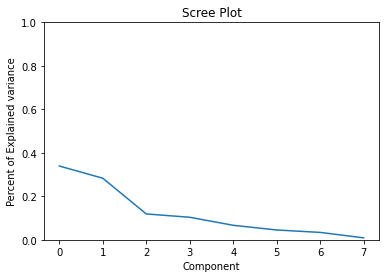

In [20]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(pca.explained_variance_ratio_)
ax.set(
    xlabel='Component',
    ylabel="Percent of Explained variance",
    title='Scree Plot',
    ylim=(0,1)
)
plt.show()

Gráfico cumulativo da PCA - Se usarmos 4 componentes teriamos 90% da variância

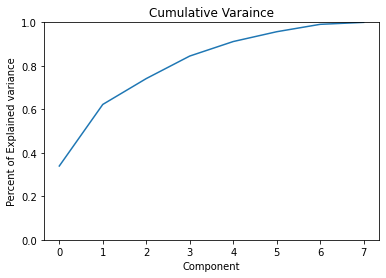

In [21]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(np.cumsum(
    pca.explained_variance_ratio_)
    )
ax.set(
    xlabel='Component',
    ylabel="Percent of Explained variance",
    title='Cumulative Varaince',
    ylim=(0,1)
)
plt.show()

Quais atributos causaram impacto em cada componente? (Heat Map)

Por exemplo, o primeiro componente foi bastante influenciado pelo pclass, age e fare.

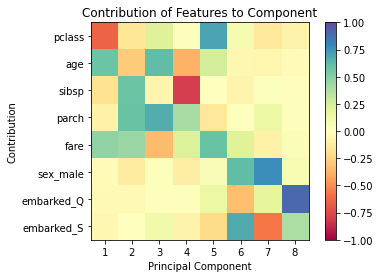

In [22]:
fig, ax = plt.subplots(figsize=(6,4))
plt.imshow(
    pca.components_.T,
    cmap='Spectral',
    vmin=-1,
    vmax=1
)
plt.yticks(range(len(X.columns)), X.columns)
plt.xticks(range(8), range(1,9))
plt.xlabel("Principal Component")
plt.ylabel("Contribution")
plt.title("Contribution of Features to Component")
plt.colorbar()

Quais atributos causaram impacto em cada componente? (Histogram)


Text(0.5, 1.0, 'Contribution of Features to Component')

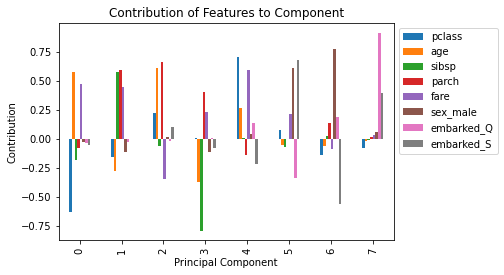

In [23]:
fig, ax = plt.subplots(figsize=(6,4))
pd.DataFrame(
    pca.components_, columns=X.columns
).plot(kind="bar", ax=ax).legend(
    bbox_to_anchor=(1,1)
)
plt.xlabel("Principal Component")
plt.ylabel("Contribution")
plt.title("Contribution of Features to Component")


Se tivermos vários atributos podemos limitar os gráficos anteriores mostrando apenas os atributos que atendam ao um peso mínimo. 

Todos os atributos nos dois primeiros componentes cujos valores absolutos sejam no mínimo 0.5

In [24]:
comps = pd.DataFrame(
    pca.components_, columns=X.columns
)
min_val = 0.5
num_components = 2
pca_cols = set()
for i in range (num_components):
  parts = comps.iloc[i][
      comps.iloc[i].abs() > min_val
  ]
  pca_cols.update(set(parts.index))

pca_cols

{'age', 'parch', 'pclass', 'sibsp'}

Gráfico de PCA gerado com Yellowbrick (2 primeiros componentes)




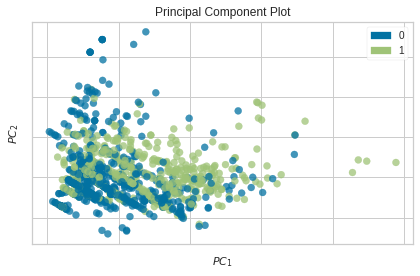

In [25]:
y = y.astype(int)
from yellowbrick.features.pca import PCADecomposition
fig, ax = plt.subplots(figsize=(6,4))
pca_viz = PCADecomposition()
pca_viz.fit_transform(X, y)
pca_viz.poof()

Gráfico de PCA 3D gerado com Yellowbrick (3 primeiros componentes)


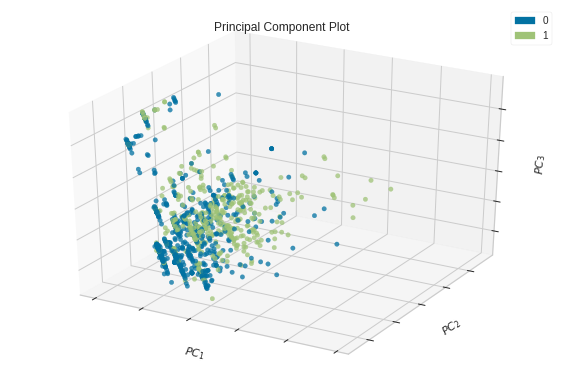

In [26]:
from yellowbrick.features.pca import PCADecomposition
pca3_viz = PCADecomposition(projection=3)
pca3_viz.fit_transform(X, y)
pca3_viz.finalize()
vig = plt.gcf()
plt.tight_layout()

Animação de PCA 3D com o scprep

In [27]:
#!pip install scprep

In [28]:
import scprep
scprep.plot.rotate_scatter3d(
    X_pca[:, :3],
    c=y,
    cmap="Spectral",
    figsize=(8,6),
    label_prefix="Principal Component"
)

ModuleNotFoundError: ignored

PCA com legenda e aspecto relativo


As cargas mostram a força dos atributos e como estão correlacionados.

Se formam angulos agudos é porque estão correlacionados.

Se formam angulos de 90º é provavel que não estejam correlacionados.

Se formam um angulo de 180 é porque tem uma correlação negativa.

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
pca_df = pd.DataFrame(
    X_pca,
    columns=[
        f"PC{i+1}" for i in range(X_pca.shape[1]) 
    ],
)

pca_df["status"] = [
    ("dead", "survived")[i] for i in y
]

evr= pca.explained_variance_ratio_
x_idx = 0
y_idx = 1
ax.set_aspect(evr[y_idx] / evr[x_idx])
x_col = pca_df.columns[x_idx]
y_col = pca_df.columns[y_idx]

sns.scatterplot(
    x=x_col,
    y=y_col,
    hue="status",
    data=pca_df,
    alpha=0.5,
    ax=ax
)

scale = 8
comps = pd.DataFrame(
    pca.components_, columns=X.columns
)

for idx, s in comps.T.iterrows():
  plt.arrow(
      0,
      0,
      s[x_idx] * scale,
      s[y_idx] * scale,
      color="k"
  )

  plt.text(
      s[x_idx] * scale,
      s[y_idx] * scale,
      idx,
      weight="bold"
  )

## **UMAP**

In [ ]:
#!pip install umap-learn

In [ ]:
from umap import UMAP
u = UMAP(random_state=42)
X_umap = u.fit_transform(X)
X_umap.shape

In [ ]:
u.n_components

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
pd.DataFrame(X_umap).plot(
    kind="scatter",
    x=0,
    y=1,
    ax=ax,
    c=y,
    alpha = 0.2,
    cmap='Spectral'
)

Ajustando o resultado do UMAP com hiperparametros de n_neighbors

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(6,4))
axes = axes.reshape(4)
for i, n in enumerate([2, 5, 10, 50]):
  ax = axes[i]
  u = UMAP(
      random_state = 42, n_neighbors=n
  )
  X_umap = u.fit_transform(X)
  pd.DataFrame(X_umap).plot(
    kind="scatter",
    x=0,
    y=1,
    ax=ax,
    c=y,
    alpha = 0.5,
    cmap='Spectral'
  )
  ax.set_title (f'nn={n}')
plt.tight_layout() 

Ajustando o resultado do UMAP com hiperparametros de min_dist

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(6,4))
axes = axes.reshape(4)
for i, n in enumerate([0, 0.33, 0.66, .99]):
  ax = axes[i]
  u = UMAP(
      random_state = 42, min_dist=n
  )
  X_umap = u.fit_transform(X)
  pd.DataFrame(X_umap).plot(
    kind="scatter",
    x=0,
    y=1,
    ax=ax,
    c=y,
    alpha = 0.5,
    cmap='Spectral'
  )
  ax.set_title (f'min_dist={n}')
plt.tight_layout() 

## **t-SNE**

In [ ]:
from sklearn.manifold import TSNE
ts = TSNE()
X_tsne = ts.fit_transform(X)
X_tsne.shape

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
colors = ["rg"[j] for j in y]
scat = ax.scatter(
   X_tsne[:, 0],
   X_tsne[:, 1],
   c=colors,
   alpha=0.5
)
ax.set_xlabel("Embedding 1")
ax.set_ylabel("Embedding 2")

Alterar o valor de perprexity pode provocar grandes efeitos no gráfico

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(6,4))
axes = axes.reshape(4)
for i, n in enumerate([2, 30, 50, 100]):
  ax = axes[i]
  t = TSNE(random_state=42, perplexity=n)
  X_tsne = t.fit_transform(X)
  pd.DataFrame(X_tsne).plot(
    kind="scatter",
    x=0,
    y=1,
    ax=ax,
    c=y,
    alpha = 0.5,
    cmap='Spectral'
  )
  ax.set_title (f'perplexity={n}')
plt.tight_layout() 

## **PHATE**

In [ ]:
!pip install phate

In [ ]:
import phate
p = phate.PHATE(random_state=42)
X_phate = p.fit_transform(X)
X_phate.shape

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
phate.plot.scatter2d(p, c=y, ax=ax, alpha=0.5)

Modificando o parametro knn

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(6,4))
axes = axes.reshape(4)
phate.PHATE(random_state=42, njobs=-1)
for i, n in enumerate([2, 5, 20, 100]):
  ax = axes[i]
  p.set_params(knn=n)
  X_phate = p.fit_transform(X)
  pd.DataFrame(X_phate).plot(
    kind="scatter",
    x=0,
    y=1,
    ax=ax,
    c=y,
    alpha = 0.5,
    cmap='Spectral'
  )
  ax.set_title (f'knn={n}')
plt.tight_layout() 